In [234]:
import pandas as pd

In [235]:
from matplotlib import pyplot as plt

In [236]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [237]:
from statsmodels.tsa.stattools import adfuller

In [238]:
from statsmodels.tsa.arima.model import ARIMA

In [239]:
import statsmodels.api as sm

In [240]:
import scipy.stats as stats

In [241]:
import pmdarima

In [242]:
from pmdarima.arima import auto_arima

In [323]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\arima200 - Python.csv')

In [244]:
df

,Y,date
0,10.191432,01/02/1967
1,3.964583,01/03/1967
2,4.967104,01/04/1967
3,1.336661,01/05/1967
4,4.862530,01/06/1967
...,...,...
495,0.367355,01/05/2008
496,1.697503,01/06/2008
497,1.906261,01/07/2008
498,2.619660,01/08/2008


In [245]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       500 non-null    float64
 1   date    500 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [326]:
df=df.set_index("date")

<AxesSubplot:xlabel='date'>

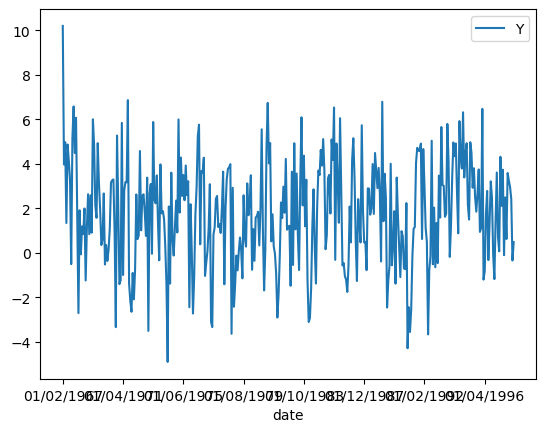

In [247]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]
validation
train.plot()

<AxesSubplot:xlabel='date'>

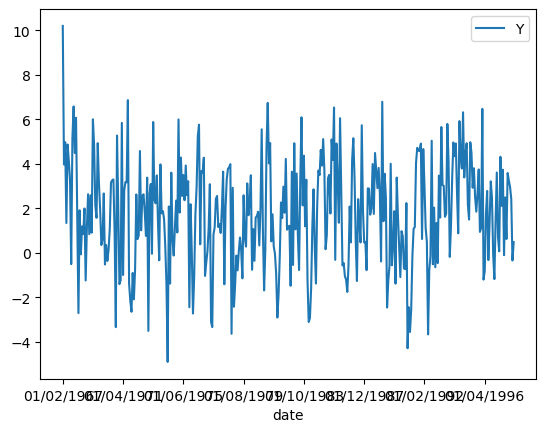

In [248]:
train.plot()

In [249]:
adfuller(train)

(-10.032888966742991,
 1.5679884145475227e-17,
 1,
 373,
 {'1%': -3.448003816652923,
  '5%': -2.86931999731073,
  '10%': -2.5709145866785503},
 1581.7481487938846)

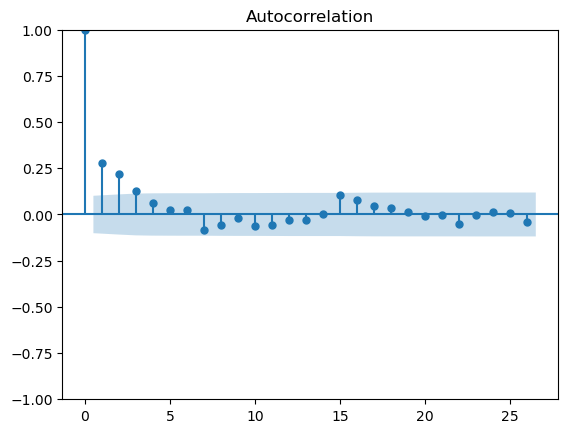

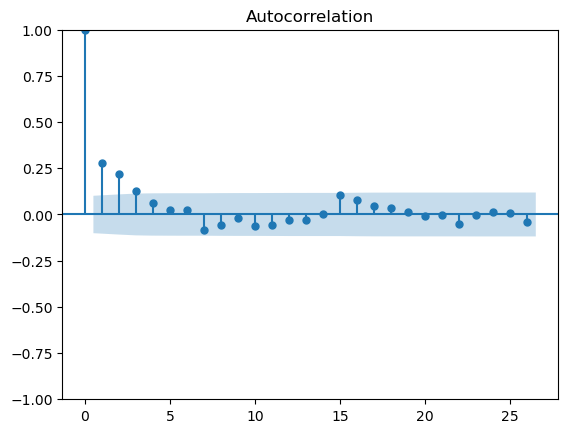

In [250]:
plot_acf(train)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


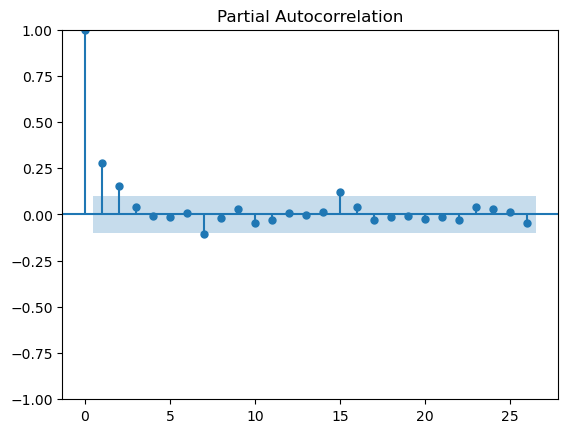

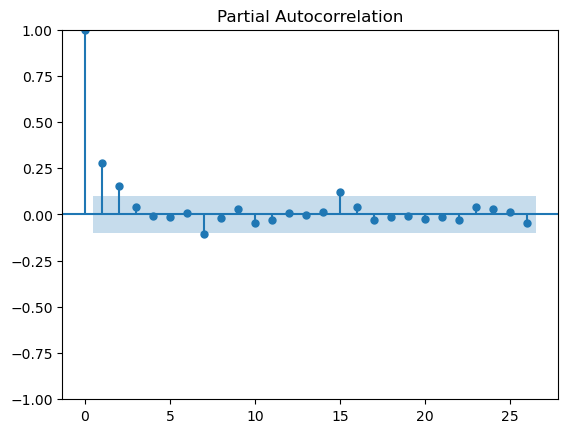

In [251]:
plot_pacf(train)

In [252]:
sarima = sm.tsa.statespace.SARIMAX(df,order=(2,0,0),seasonal_order=(0,0,0,0)).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [253]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  500
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1133.569
Date:                Sun, 05 Feb 2023   AIC                           2273.139
Time:                        21:33:08   BIC                           2285.783
Sample:                             0   HQIC                          2278.100
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3907      0.042      9.274      0.000       0.308       0.473
ar.L2          0.2982      0.043      6.859      0.000       0.213       0.383
sigma2         5.4482      0.337     16.178      0.000       4.788       6.108
===================================================================================
Ljung-Box (L1) (Q):                   6.61   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.01   Prob(JB):                         0.83
Heteroskedasticity (H):               0.76   Skew:                             0.01
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [254]:
auto_model = auto_arima(train, start_p=0, start_q=0,start_P=0,start_Q=0,information_criterion='aic',m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  375
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -835.312
Date:                Sun, 05 Feb 2023   AIC                           1678.624
Time:                        21:33:14   BIC                           1694.332
Sample:                             0   HQIC                          1684.860
                                - 375                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0639      0.165      6.457      0.000       0.741       1.387
ar.L1          0.2426      0.050      4.880      0.000       0.145       0.340
ar.L2          0.1575      0.053      2.986      0.003       0.054       0.261
sigma2         5.0367      0.364     13.829      0.000       4.323       5.751
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.77   Prob(JB):                         0.98
Heteroskedasticity (H):               0.73   Skew:                            -0.00
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [255]:
forecasts, conf_int  = auto_model.predict(125,return_conf_int=True,alpha=0.05)
conf_int_df=pd.DataFrame(conf_int)
conf_int_df.rename(columns = {0:'LFI',1:'UFI'}, inplace = True)
forecasts_df=pd.DataFrame(forecasts)
forecasts_df.rename(columns = {0:'Forecasts'}, inplace = True)
range_date = pd.date_range(start ='01-05-1998', freq ='MS', periods = 125)
range_date_df=range_date.to_frame(index = False)
range_date_df.rename(columns = {0:'Date'}, inplace = True)

forecasts_df=forecasts_df.reset_index(drop=True)
forecasts_df
range_date_df
in_sample=auto_model.predict_in_sample()

in_sample=pd.DataFrame(in_sample)




C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [256]:
conf_int_df

,LFI,UFI
0,-3.273731,5.523604
1,-3.114374,5.938060
2,-3.041677,6.208578
3,-2.972035,6.312538
4,-2.930501,6.367154
...,...,...
120,-2.877986,6.424304
121,-2.877986,6.424304
122,-2.877986,6.424304
123,-2.877986,6.424304


<AxesSubplot:xlabel='Date'>

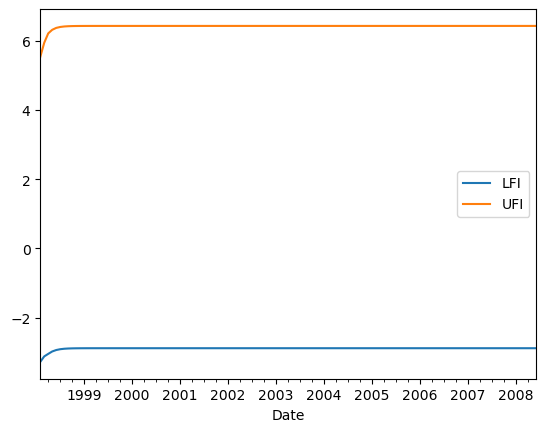

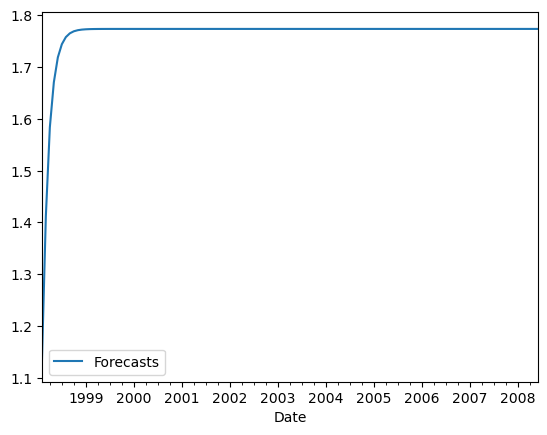

In [280]:
fi=pd.concat([range_date_df,conf_int_df],axis=1)

fi=fi.set_index("Date")

forecasts=pd.concat([range_date_df,forecasts_df],axis=1)
forecasts
forecasts["Date"]=pd.to_datetime(forecasts["Date"])
forecasts=forecasts.set_index("Date")
forecasts
fi
fi.plot()
forecasts.plot()

In [258]:
residuals=pd.concat([train,in_sample],axis=1)
residuals["resid"]=residuals["Y"]-residuals["predicted_mean"]
residuals

,Y,predicted_mean,resid
date,,,
01/02/1967,10.191432,1.773159,8.418273
01/03/1967,3.964583,4.196704,-0.232121
01/04/1967,4.967104,3.630231,1.336873
01/05/1967,1.336661,2.892939,-1.556278
01/06/1967,4.862530,2.170192,2.692338
...,...,...,...
01/12/1997,3.238836,2.030067,1.208769
01/01/1998,2.960002,2.413624,0.546378
01/02/1998,2.408988,2.291822,0.117166


In [259]:
sm.stats.acorr_ljungbox(residuals["resid"], lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,13.85038,0.838


In [268]:
forecasts.info()

<class 'pandas.core.series.Series'>
RangeIndex: 240 entries, 500 to 739
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
240 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


<AxesSubplot:xlabel='Date'>

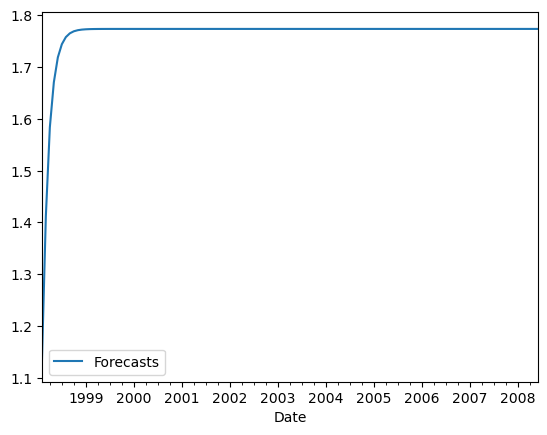

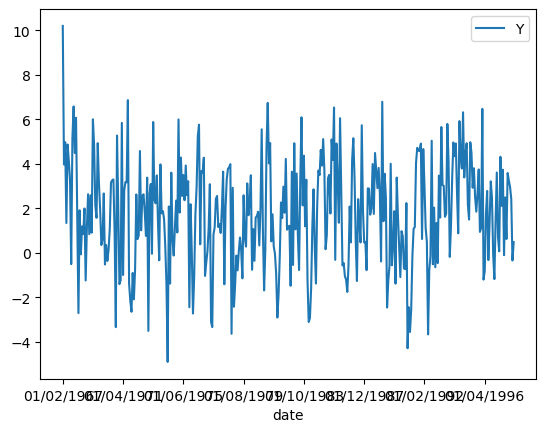

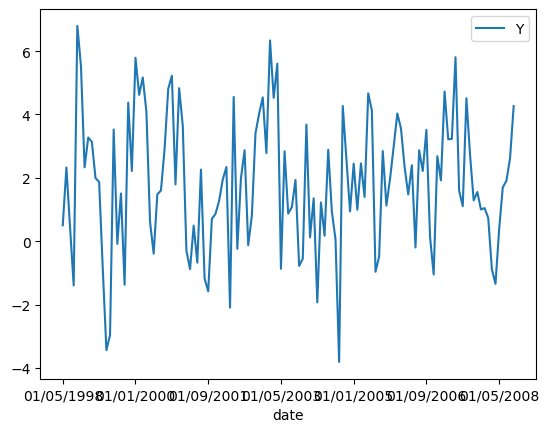

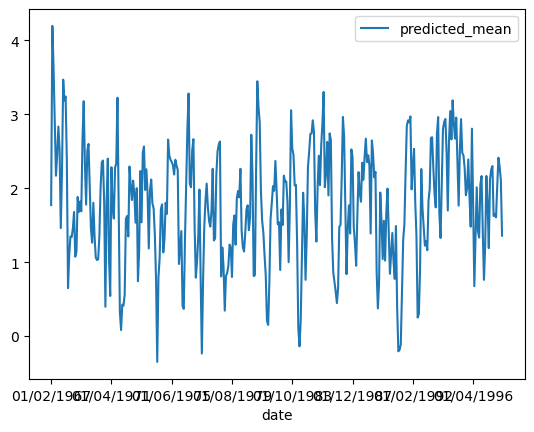

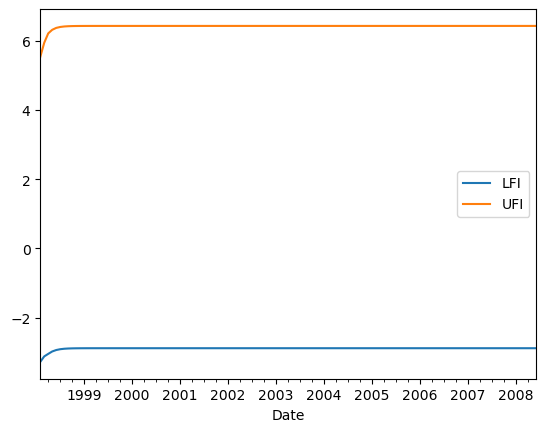

In [277]:
forecasts.plot()
train.plot()
validation.plot()
in_sample.plot()
fi.plot()

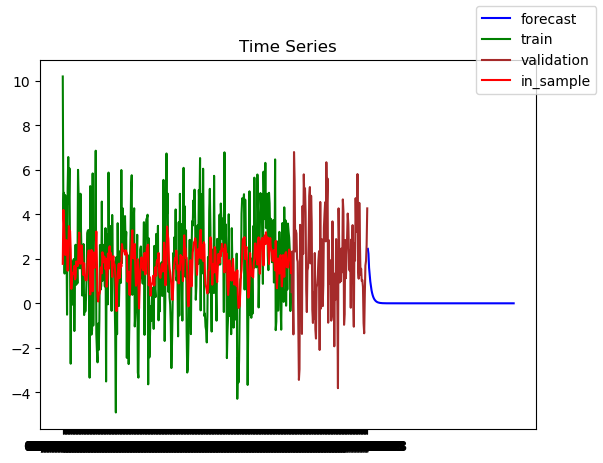

In [292]:
fig, ax = plt.subplots()
ax.plot(forecasts,color='blue',label='forecast')
ax.plot(train,color='green',label='train')
ax.plot(validation,color='brown',label='validation')
ax.plot(in_sample,color='red',label='in_sample')

ax.set_title('Time Series')
fig.legend()


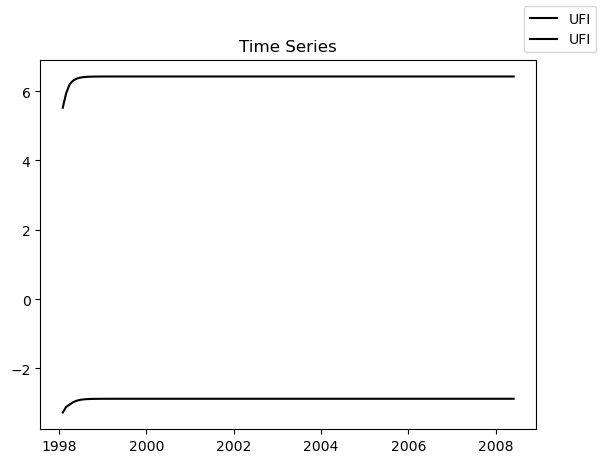

In [291]:
fig, ax = plt.subplots()
ax.plot(fi["UFI"],color='black',label='UFI')
ax.plot(fi["LFI"],color='black',label='UFI')
ax.set_title('Time Series')
fig.legend()

In [261]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
               # ACF1
    return({'mape':mape, 'mae': mae,  'rmse':rmse})

In [262]:
forecast_accuracy(forecasts.values,validation.values)

{'mape': 1.900371534676788, 'mae': 1.7144747572245942, 'rmse': 2.1313645570442}

In [263]:
sarimax = sm.tsa.statespace.SARIMAX(df,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [329]:
from pandas.tseries.offsets import DateOffset
pred_date=[df.index[-1]+ DateOffset(month=x)for x in range(0,24)]

TypeError: 'date' is an invalid keyword argument for __new__()

In [328]:
df

,Y
date,
01/02/1967,10.191432
01/03/1967,3.964583
01/04/1967,4.967104
01/05/1967,1.336661
01/06/1967,4.862530
...,...
01/05/2008,0.367355
01/06/2008,1.697503
01/07/2008,1.906261


,Y,forecast
date,,
01/02/1967,10.191432,NaN
01/03/1967,3.964583,NaN
01/04/1967,4.967104,NaN
01/05/1967,1.336661,NaN
01/06/1967,4.862530,NaN
...,...,...
01/05/2008,0.367355,-3.363493e-12
01/06/2008,1.697503,-2.607921e-12
01/07/2008,1.906261,-2.022079e-12


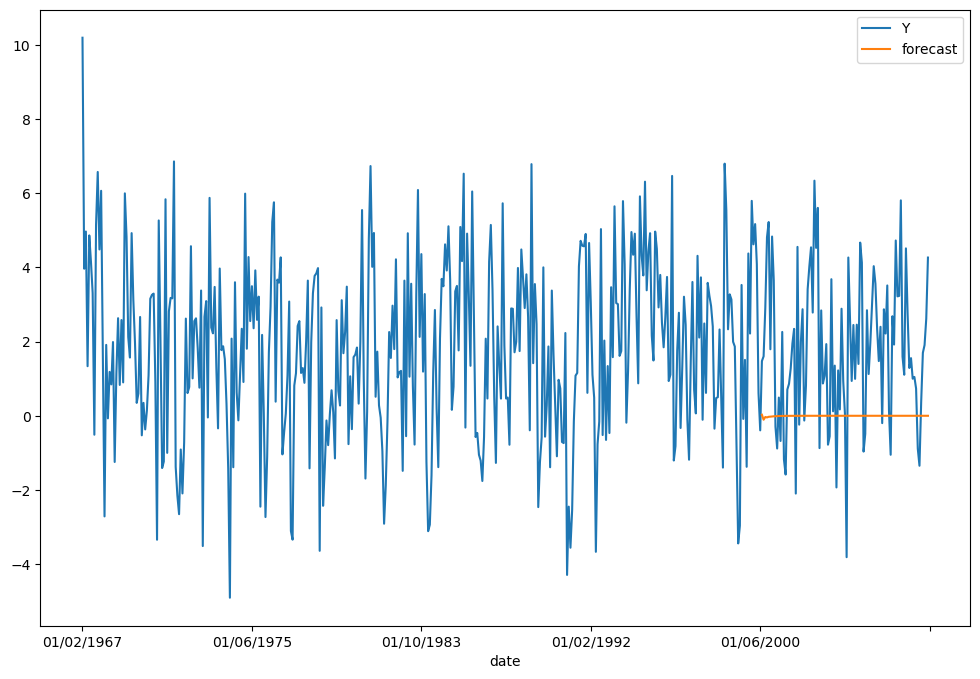

In [317]:
df['forecast']=sarimax.predict(start=401,end=499,dynamic=True)
df[['Y','forecast']].plot(figsize=(12,8))
df


In [285]:

pred = sarimax.get_forecast(steps = 240)
forecasts=pred.predicted_mean
ci=pred.conf_int()

ci["for"]=forecasts
range_date = pd.date_range(start ='2008-01-10', freq ='MS', periods = 240)
ci["date"]=range_date
ci=ci.set_index("date")


C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


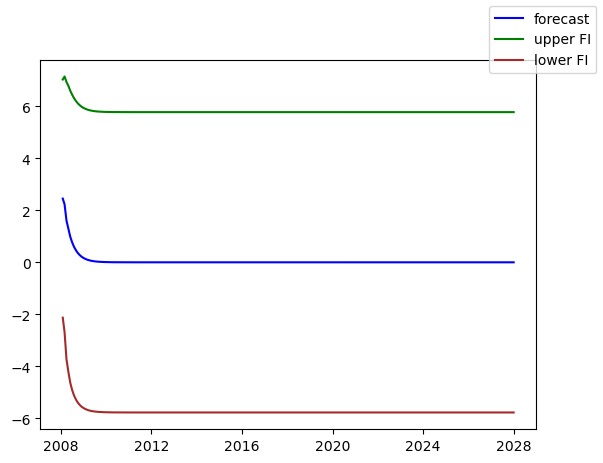

In [284]:
fig, ax = plt.subplots()
#ax.plot(df["Y"])
ax.plot(ci["for"],color='blue',label='forecast')
ax.plot(ci["upper Y"],color='green',label='upper FI')
ax.plot(ci["lower Y"],color='brown',label='lower FI')
fig.legend()